In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import os
import numpy as np

# Specify the file path
file_path = r'C:\Users\Qazi Fabia Hoq\SalesDataFMCG\retaildata.csv'


# Read the CSV file
df = pd.read_csv(file_path)


# Display the head of the DataFrame
display(df.head())

,order_id,dt_order,product_id,segment,category,sub_category,product,mrp_inr,cost_per_unit,store_id,...,state,city,city_synonym,population,population_group,quantity,sales,cost_price,discount,profit
0,1,2022-03-26,10024,Foods,Beverages,Tea,Sunbean Darjeeling Tea,90,57,298,...,Kerala,Kozhikode,CCJ,1010000,Tier 2 Cities,574,51660,32931,0.00,18729
1,2,2021-03-14,10054,Household,Cleaning,Dishwash Liquids,Pril Power Dishwash Liquid,70,46,313,...,Andhra Pradesh,Guntur,GTR,688000,Tier 2 Cities,708,49560,32866,0.12,10746
2,3,2021-06-23,10105,Personal Care,Skin Care,Moisturizers,Cetaphil Moisturizing Cream,220,176,207,...,Haryana,Rohtak,RHT,890000,Tier 3 Cities,663,145860,116900,0.10,14374
3,4,2019-09-27,10047,Household,Cleaning,Dishwash Liquids,Vim Bar,10,8,264,...,Rajasthan,Jodhpur,JDH,1150000,Tier 3 Cities,110,1100,832,0.10,158
4,5,2023-03-05,10143,Personal Care,Hair Care,Hair Color,Wella Color Charm Demi-Permanent Hair Color,270,184,373,...,Uttarakhand,Dehradun,DED,578000,Tier 2 Cities,876,236520,161289,0.00,75231


In [90]:
# Group the data by product and sum the sales column
total_sales_per_product = df.groupby('product')['sales'].sum().reset_index()

# Sort the results in descending order of total sales
total_sales_per_product = total_sales_per_product.sort_values(by='sales', ascending=False)

# Display the total sales revenue for each product
print(total_sales_per_product)


                                               product     sales
52   Garnier Olia Bold Ammonia Free Permanent Hair ...  11573260
84                      L'Oréal Paris Feria Hair Color  11268160
133            Revlon Total Color Permanent Hair Color  11136000
114         Neutrogena Ultra Sheer Dry-Touch Sunscreen  11127900
83           L'Oréal Paris Excellence Crème Hair Color  10369450
..                                                 ...       ...
164       Sunfeast Mom's Magic Cashew & Almond Cookies    836250
16                           Bingo! Tedhe Medhe Masala    624640
17                       Bingo! Yumitos Original Style    581130
163                               Sunfeast Marie Light    417380
171                                            Vim Bar    250160

[185 rows x 2 columns]


# Retail Sales Analysis Questions

#### Questions we are asking: 

What is the distribution of sales by category?

How do sales vary over time?

Which stores have the highest sales revenue?

What is the average sales price of top 20 selling products?

How effective are discounts in driving sales?

What is the profitability of top 20 selling product?

What is the profitability of bottom 20 selling product?

How do sales vary across different regions?

What is the average sales per product category?

How does the quantity sold vary for the top 20 selling products?



#### KPI Analysis:
Product Sales Growth Rate: How has the sales growth rate changed from the previous period to the current period for each product category?

Category Market Share: What is the market share of each product category based on sales revenue?

Profit Margin per Product: What is the profit margin for each product, calculated as the percentage of profit from the sales revenue?

Customer Reach Index: How many orders were placed for each product, and what percentage of total orders does this represent?

Customer Acquisition Cost: How much does it cost to acquire a new customer for each product category, based on total marketing and acquisition expenses divided by the number of new customers acquired?


# What is the distribution of sales by category?

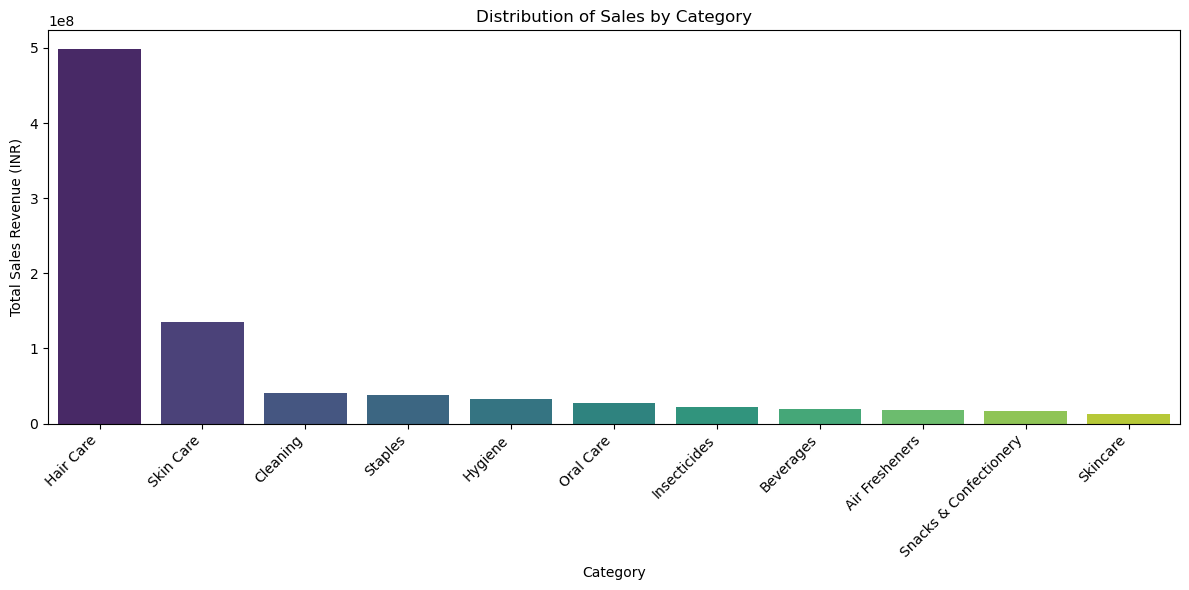

In [91]:
# Calculate total sales revenue for each category
sales_by_category = df.groupby('category')['sales'].sum().sort_values(ascending=False).reset_index()

# Create the bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='sales', data=sales_by_category, palette='viridis')
plt.title('Distribution of Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales Revenue (INR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# How do sales vary over time?

### Total Sales Over Time (By Year)

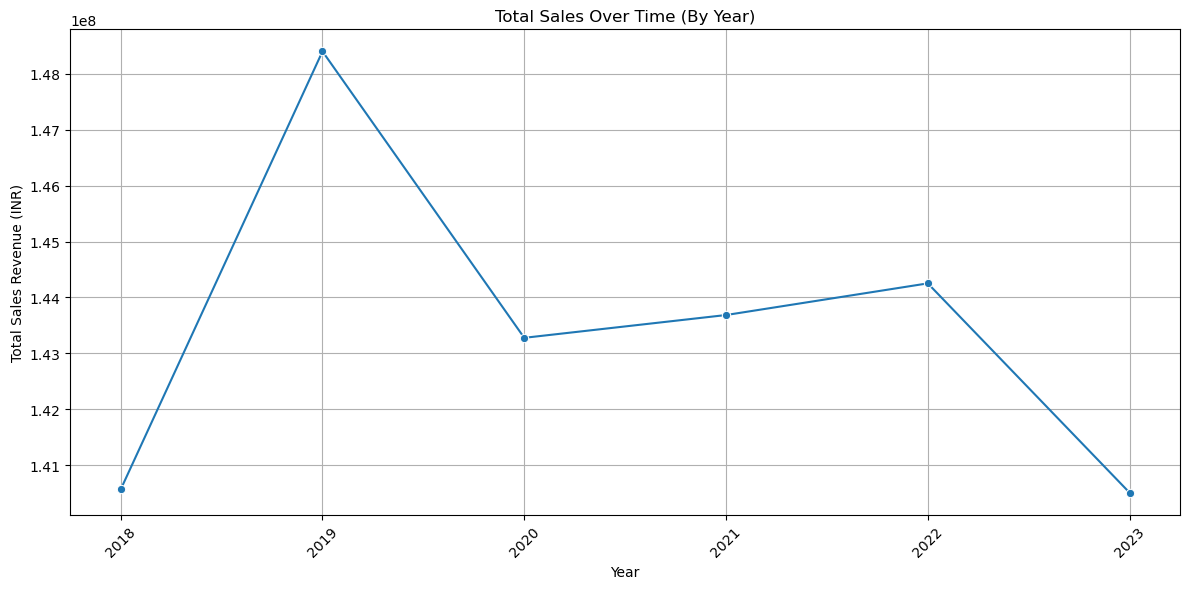

In [92]:
# Convert 'dt_order' column to datetime
df['dt_order'] = pd.to_datetime(df['dt_order'])

# Extract year from 'dt_order' column
df['year'] = df['dt_order'].dt.year

# Group data by year and calculate total sales for each year
yearly_sales = df.groupby('year')['sales'].sum().reset_index()

# Plot the total sales over time using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='sales', data=yearly_sales, marker='o')
plt.title('Total Sales Over Time (By Year)')
plt.xlabel('Year')
plt.ylabel('Total Sales Revenue (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


### Total Sales Over Time (By Month)

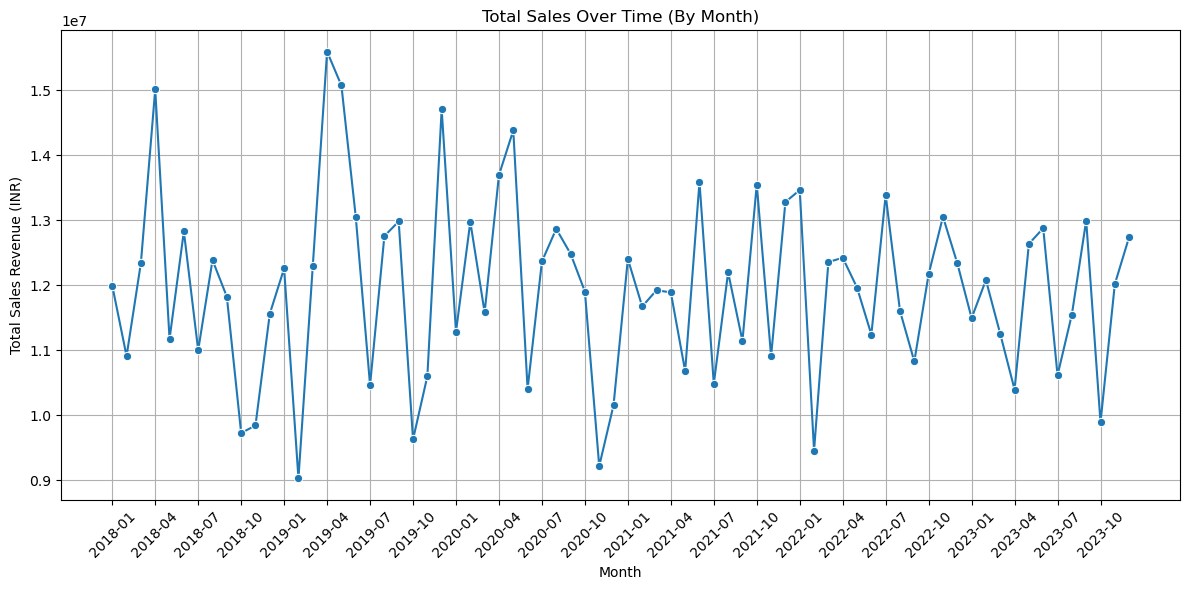

In [93]:
# Convert 'dt_order' column to datetime
df['dt_order'] = pd.to_datetime(df['dt_order'])

# Extract month and year from 'dt_order' column
df['month_year'] = df['dt_order'].dt.to_period('M').astype(str)

# Group data by month and calculate total sales for each month
monthly_sales = df.groupby('month_year')['sales'].sum().reset_index()

# Plot the total sales over time using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='month_year', y='sales', data=monthly_sales, marker='o')
plt.title('Total Sales Over Time (By Month)')
plt.xlabel('Month')
plt.ylabel('Total Sales Revenue (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)


ax.set_xticks(ax.get_xticks()[::3])
plt.show()



# Which stores have the highest sales revenue?

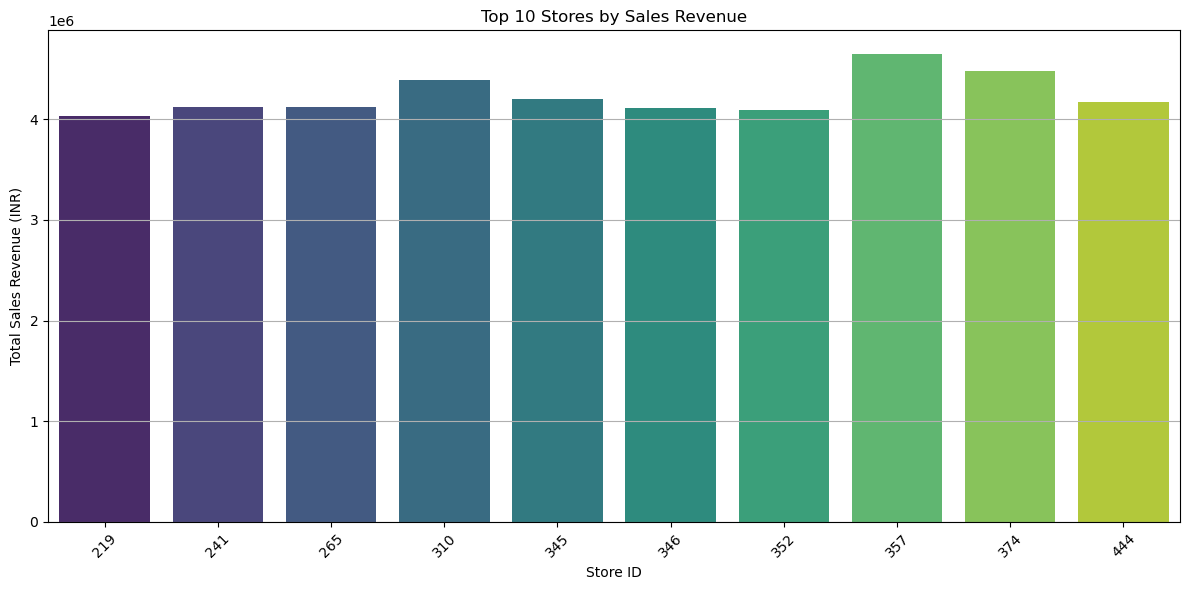

In [94]:
# Group data by store and calculate total sales for each store
store_sales = df.groupby('store_id')['sales'].sum().reset_index()

# Sort stores by total sales in descending order
store_sales_sorted = store_sales.sort_values(by='sales', ascending=False).head(10)

# Plot the total sales for each store using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='store_id', y='sales', data=store_sales_sorted, palette='viridis')
plt.title('Top 10 Stores by Sales Revenue')
plt.xlabel('Store ID')
plt.ylabel('Total Sales Revenue (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


# What is the average sales price of top 20 selling products?

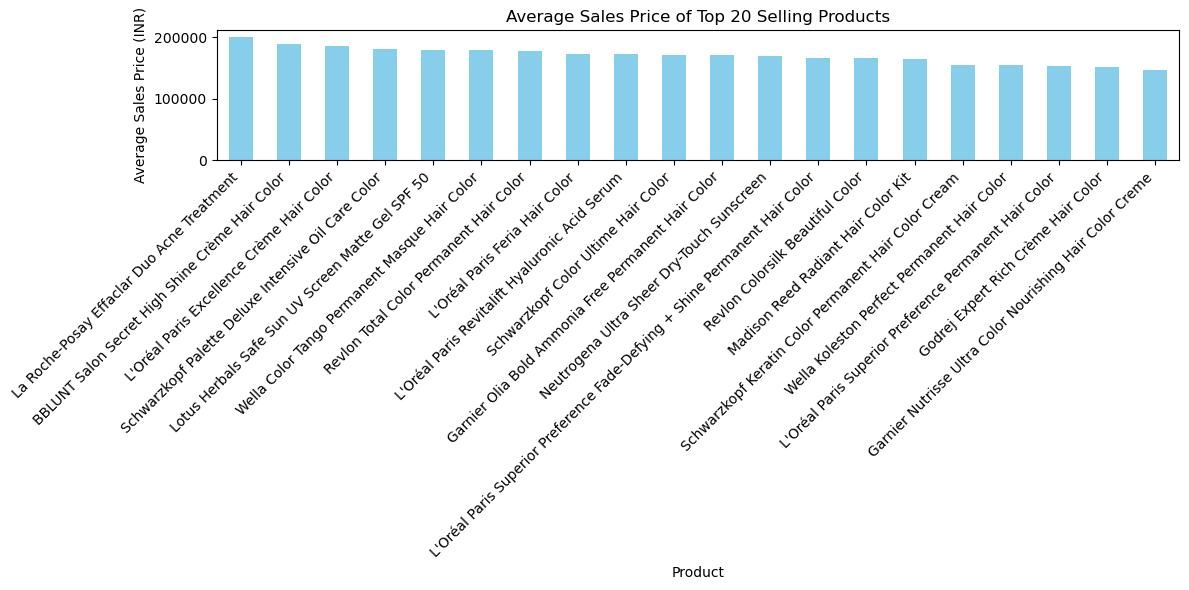

In [95]:
# Calculate total sales revenue for each product
top_sellers = df.groupby('product')['sales'].sum().sort_values(ascending=False).head(20)

# Filter the DataFrame to include only the top 20 selling products
top_20_products = df[df['product'].isin(top_sellers.index)]

# Calculate the average sales price for the top 20 selling products
avg_sales_price_top_20 = top_20_products.groupby('product')['sales'].mean().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
avg_sales_price_top_20.plot(kind='bar', color='skyblue')
plt.title('Average Sales Price of Top 20 Selling Products')
plt.xlabel('Product')
plt.ylabel('Average Sales Price (INR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# How effective are discounts in driving sales?

In [96]:
# Calculate total sales revenue for products with discounts
discounted_sales = df[df['discount'] > 0]['sales'].sum()

# Calculate total sales revenue for products without discounts
non_discounted_sales = df[df['discount'] == 0]['sales'].sum()

# Calculate the percentage increase in sales due to discounts
discount_effectiveness = ((discounted_sales - non_discounted_sales) / non_discounted_sales) * 100

print(f"The percentage increase in sales due to discounts is: {discount_effectiveness:.2f}%")


The percentage increase in sales due to discounts is: 206.69%


# What is the profitability of top 20 selling product?

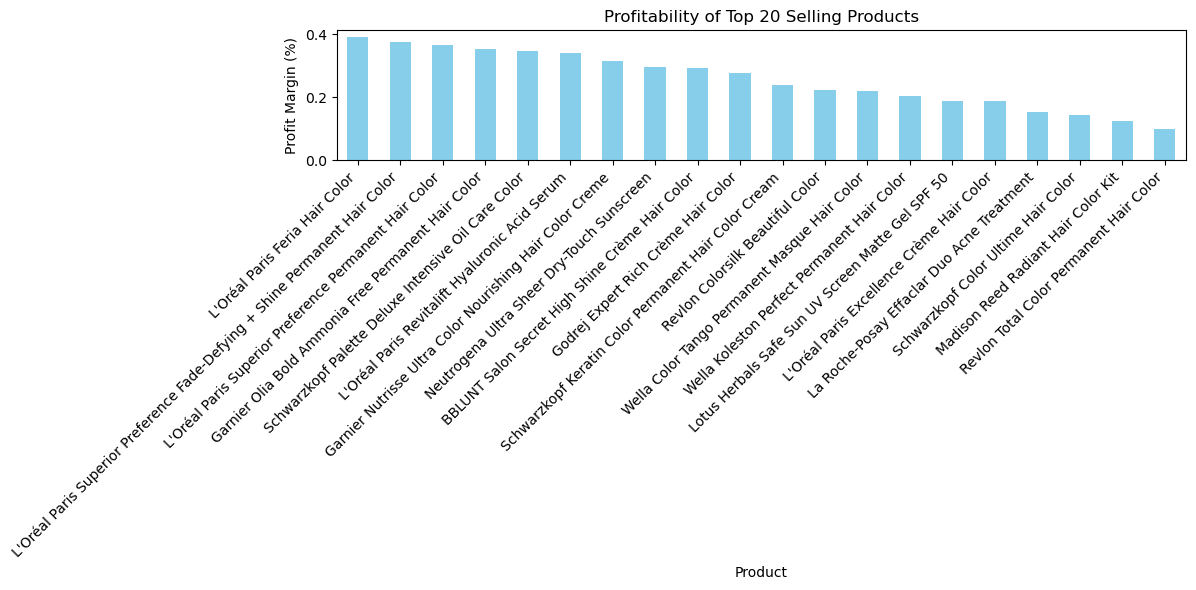

In [97]:
# Calculate profit for each product
df['profit'] = df['sales'] - df['cost_price']

# Identify the top 20 selling products by revenue
top_20_selling_products = df.groupby('product')['sales'].sum().nlargest(20).index

# Filter the dataframe to include only the top 20 selling products
top_20_df = df[df['product'].isin(top_20_selling_products)]

# Calculate profitability for each product
profitability = top_20_df.groupby('product')['profit'].sum() / top_20_df.groupby('product')['sales'].sum()

# Plot the profitability of the top 20 selling products
plt.figure(figsize=(12, 6))
profitability.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Profitability of Top 20 Selling Products')
plt.xlabel('Product')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# What is the profitability of bottom 20 selling product?

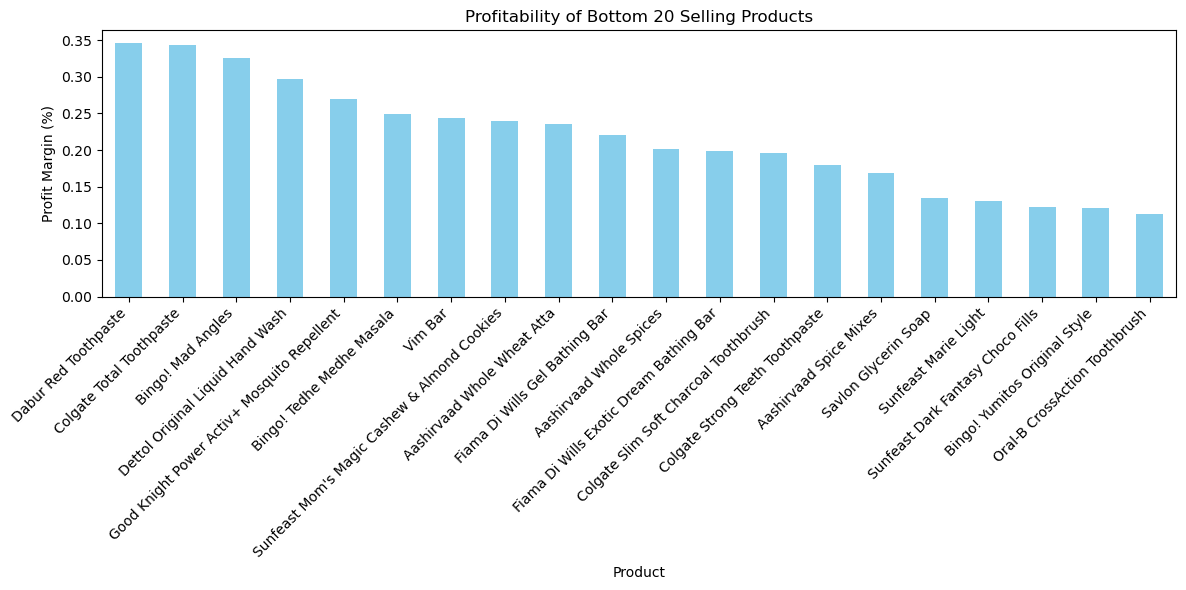

In [98]:
# Calculate profit for each product
df['profit'] = df['sales'] - df['cost_price']

# Identify the bottom 20 selling products by revenue
bottom_20_selling_products = df.groupby('product')['sales'].sum().nsmallest(20).index

# Filter the dataframe to include only the bottom 20 selling products
bottom_20_df = df[df['product'].isin(bottom_20_selling_products)]

# Calculate profitability for each product
profitability_bottom = bottom_20_df.groupby('product')['profit'].sum() / bottom_20_df.groupby('product')['sales'].sum()

# Plot the profitability of the bottom 20 selling products
plt.figure(figsize=(12, 6))
profitability_bottom.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Profitability of Bottom 20 Selling Products')
plt.xlabel('Product')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# How do sales vary across different regions?

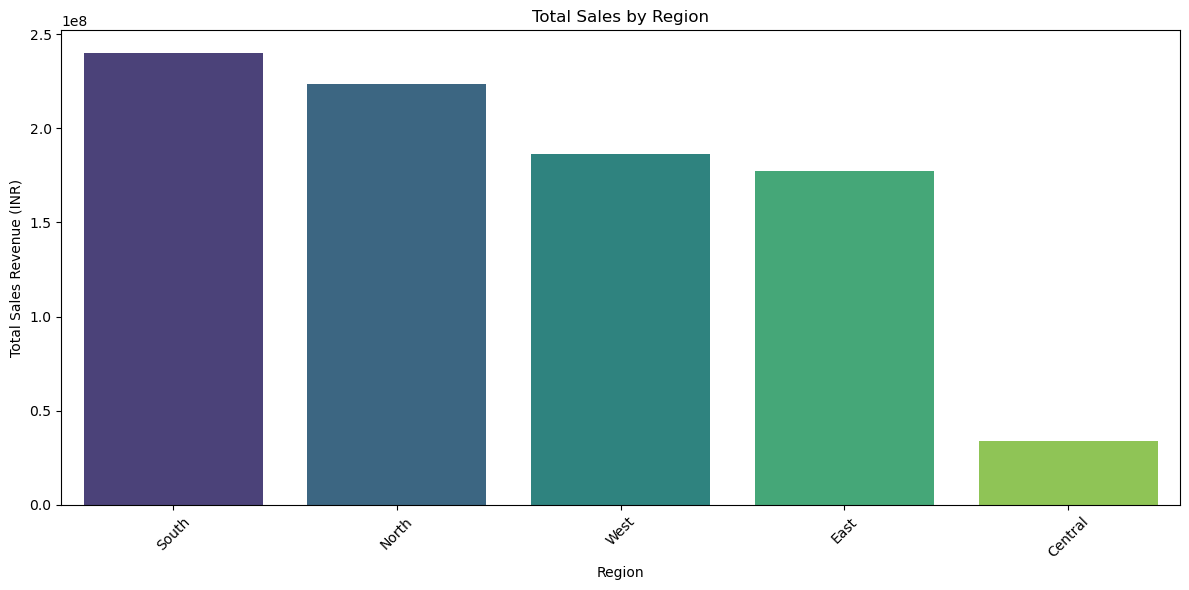

In [99]:
# Group data by region and calculate total sales for each region
region_sales = df.groupby('region')['sales'].sum().sort_values(ascending=False)

# Plot the total sales by region
plt.figure(figsize=(12, 6))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Revenue (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# What is the average sales per product category?

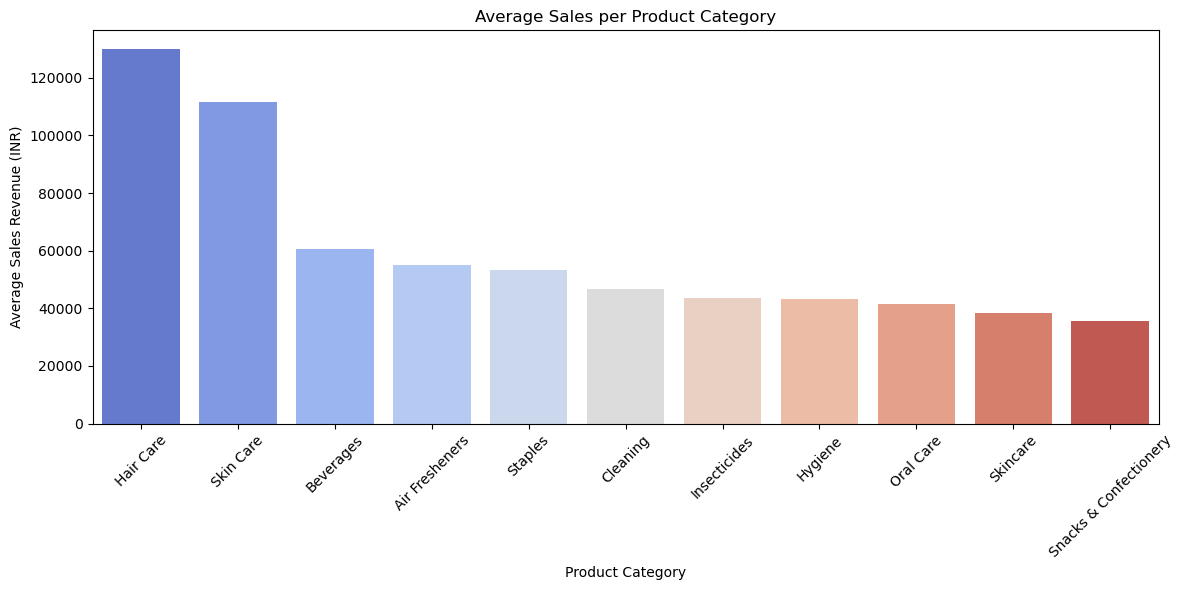

In [100]:
# Calculate average sales per product category
avg_sales_category = df.groupby('category')['sales'].mean().sort_values(ascending=False)

# Plot the average sales per product category
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_sales_category.index, y=avg_sales_category.values, palette='coolwarm')
plt.title('Average Sales per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Sales Revenue (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# How does the quantity sold vary for the top 20 selling products?

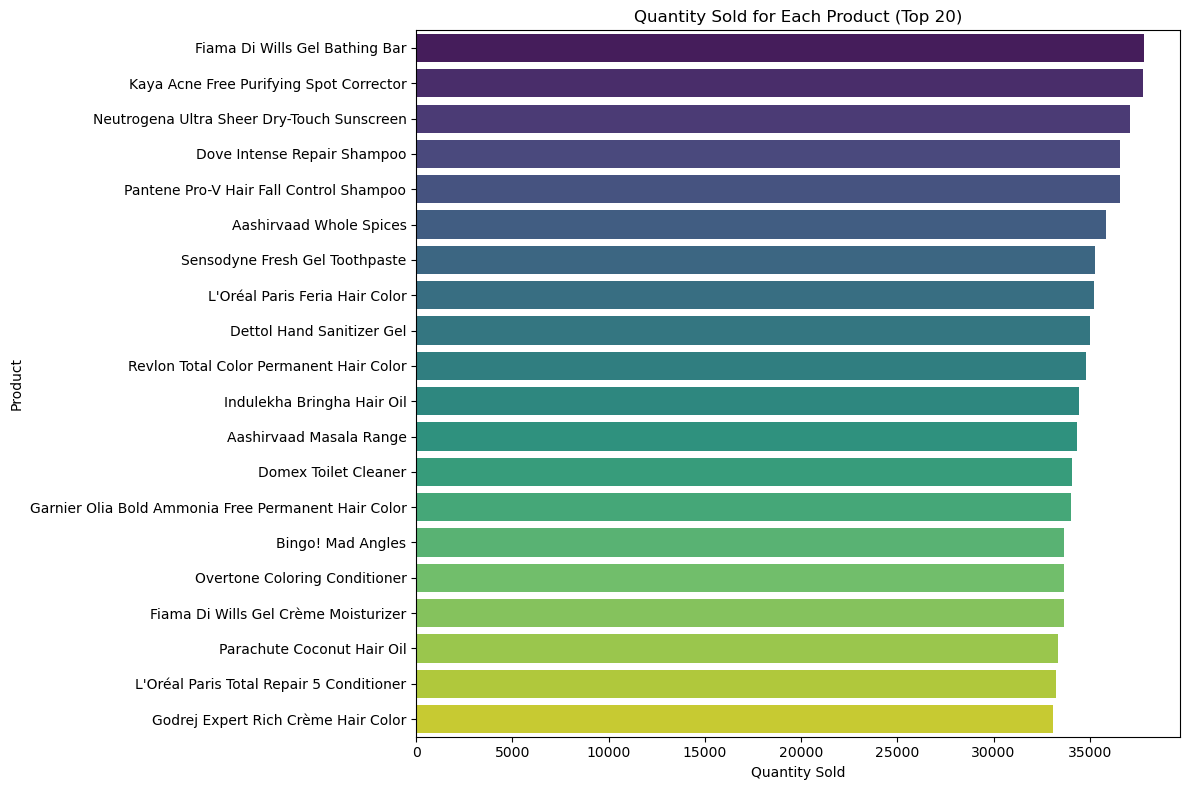

In [101]:
# Calculate total quantity sold for each product
quantity_sold = df.groupby('product')['quantity'].sum().sort_values(ascending=False).head(20)

# Plot the quantity sold for each product
plt.figure(figsize=(12, 8))
sns.barplot(x=quantity_sold.values, y=quantity_sold.index, palette='viridis')
plt.title('Quantity Sold for Each Product (Top 20)')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


# Sales KPI

## Product Sales Growth Rate: How has the sales growth rate changed from the previous period to the current period for each product category?

In [102]:
# Group the data by 'category' and 'dt_order' and calculate total sales for each category for each period
sales_by_category_period = df.groupby(['category', df['dt_order'].dt.to_period('M')])['sales'].sum().unstack()

# Calculate the sales growth rate for each category
sales_growth_rate = ((sales_by_category_period.iloc[:, -1] - sales_by_category_period.iloc[:, -2]) / sales_by_category_period.iloc[:, -2]) * 100

# Display the sales growth rate for each product category
print(sales_growth_rate)


category
Air Fresheners             32.056718
Beverages                 -63.570307
Cleaning                   -2.288535
Hair Care                   9.187941
Hygiene                   -49.258241
Insecticides              109.325641
Oral Care                  47.433926
Skin Care                  29.073654
Skincare                  -19.340889
Snacks & Confectionery    -91.185548
Staples                   -12.152524
dtype: float64


## Category Market Share: What is the market share of each product category based on sales revenue?

In [103]:
# Calculate the total sales revenue for each product category
category_sales = df.groupby('category')['sales'].sum()

# Calculate the total sales revenue across all categories
total_sales = category_sales.sum()

# Calculate the market share of each category
market_share = (category_sales / total_sales) * 100

# Display the market share of each category
print(market_share)


category
Air Fresheners             2.100371
Beverages                  2.224010
Cleaning                   4.662941
Hair Care                 57.919188
Hygiene                    3.877092
Insecticides               2.516618
Oral Care                  3.120597
Skin Care                 15.678751
Skincare                   1.540295
Snacks & Confectionery     1.965595
Staples                    4.394540
Name: sales, dtype: float64


## Profit Margin per Product: What is the profit margin for each product, calculated as the percentage of profit from the sales revenue?

In [104]:
# Calculate the profit per product
df['profit'] = df['sales'] - df['cost_price']

# Calculate the sales per product
sales_per_product = df.groupby('product')['sales'].sum()

# Calculate the cost per product
cost_per_product = df.groupby('product')['cost_price'].sum()

# Calculate the profit margin per product
profit_margin_per_product = (df.groupby('product')['profit'].sum() / sales_per_product) * 100

# Display the profit margin per product
print(profit_margin_per_product)


product
Aashirvaad Chana Dal                              18.385026
Aashirvaad Masala Range                           38.452242
Aashirvaad Rajma                                  34.594624
Aashirvaad Select Sharbati Atta                   26.235230
Aashirvaad Spice Mixes                            16.868744
                                                    ...    
WOW Skin Science Vitamin C Glow Clay Face Mask    22.493014
Wella Color Charm Demi-Permanent Hair Color       31.807670
Wella Color Charm Permanent Liquid Hair Color     10.184231
Wella Color Tango Permanent Masque Hair Color     22.171973
Wella Koleston Perfect Permanent Hair Color       20.471063
Length: 185, dtype: float64


## Customer Reach Index: How many orders were placed for each product, and what percentage of total orders does this represent?

In [105]:
# Calculate the number of orders for each product
orders_per_product = df.groupby('product')['order_id'].nunique()

# Calculate the total number of orders
total_orders = df['order_id'].nunique()

# Calculate the Customer Reach Index for each product
customer_reach_index = (orders_per_product / total_orders) * 100

# Display the Customer Reach Index for each product
print(customer_reach_index)


product
Aashirvaad Chana Dal                              0.57
Aashirvaad Masala Range                           0.67
Aashirvaad Rajma                                  0.45
Aashirvaad Select Sharbati Atta                   0.58
Aashirvaad Spice Mixes                            0.41
                                                  ... 
WOW Skin Science Vitamin C Glow Clay Face Mask    0.41
Wella Color Charm Demi-Permanent Hair Color       0.63
Wella Color Charm Permanent Liquid Hair Color     0.43
Wella Color Tango Permanent Masque Hair Color     0.52
Wella Koleston Perfect Permanent Hair Color       0.66
Name: order_id, Length: 185, dtype: float64


## Customer Acquisition Cost: How much does it cost to acquire a new customer for each product category, based on total marketing and acquisition expenses divided by the number of new customers acquired?

In [106]:
# Calculate the total marketing and acquisition expenses for each product category
total_expenses_per_category = df.groupby('category')['cost_price'].sum()  # Assuming 'cost_price' represents the total expenses

# Calculate the number of new customers acquired in each product category
new_customers_per_category = df.groupby('category')['order_id'].nunique()  # Assuming 'order_id' represents the number of orders

# Calculate the Customer Acquisition Cost (CAC) for each product category
cac_per_category = total_expenses_per_category / new_customers_per_category

# Display the Customer Acquisition Cost (CAC) for each product category
print(cac_per_category)

category
Air Fresheners            41618.844985
Beverages                 46339.363924
Cleaning                  35892.150812
Hair Care                 96750.667362
Hygiene                   32381.940492
Insecticides              33675.868952
Oral Care                 30395.882716
Skin Care                 84934.080925
Skincare                  28692.559420
Snacks & Confectionery    28595.338235
Staples                   40223.389831
dtype: float64


# Product Analysis

#### Questions we are asking: 
What are the top-selling products by revenue?

What is the overall sales and monthly sales trend in 2023?

How are the categories performing by states in sales?

What is the overall profit? What is the profit by product and category?

How are the sales by population and categories?

What is the profit for the top 20 products?

#### KPI Analysis



Product Performance Index: What are the top 5 products by Product Performance Index (PPI), and how do their performance indices compare to the average performance of all products? 

Product Revenue Concentration: What is the proportion of total revenue contributed by the top 5 selling products, and how does this distribution impact overall revenue?

Product Sales Velocity: What are the top 5 products by sales velocity, and how does their sales velocity impact overall revenue and profitability?


Product Return Rate: What are the top 5 products by return rate, and how does their return rate impact overall revenue and profitability?



# What are the top-selling products by revenue?

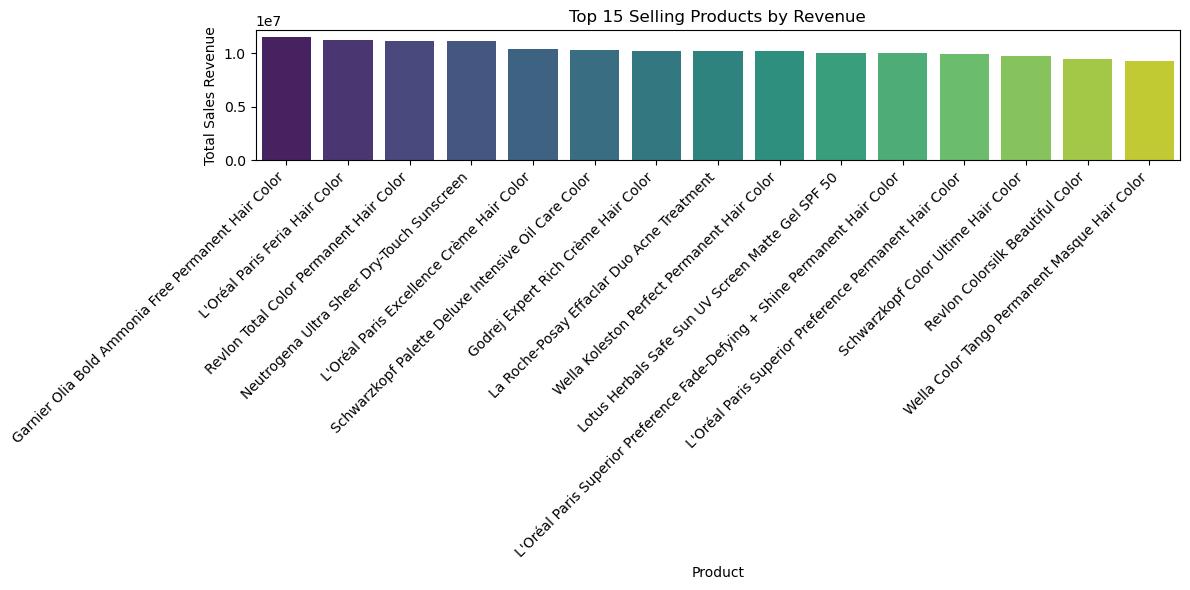

In [107]:
# Group the data by product and sum the sales revenue
top_selling_products = df.groupby('product')['sales'].sum().reset_index()

# Sort the products based on total revenue
top_selling_products = top_selling_products.sort_values(by='sales', ascending=False)

# Select the top 15 selling products
top_15_selling_products = top_selling_products.head(15)

# Plotting the bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='product', y='sales', data=top_15_selling_products, palette='viridis')
plt.title('Top 15 Selling Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Total Sales Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# What is the overall sales and monthly sales trend in 2023?

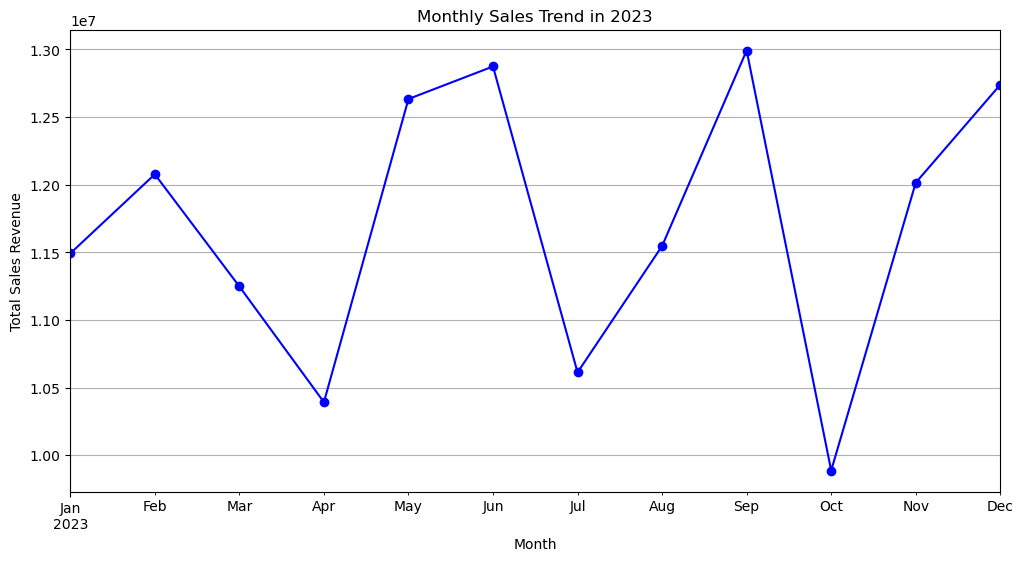

In [108]:
# Convert the 'dt_order' column to datetime format if it's not already
df['dt_order'] = pd.to_datetime(df['dt_order'])

# Filter the data for the year 2023
df_2023 = df[df['dt_order'].dt.year == 2023]

# Group the data by month and sum the sales revenue
monthly_sales_2023 = df_2023.groupby(df_2023['dt_order'].dt.to_period('M'))['sales'].sum()

# Plotting the monthly sales trend in 2023
plt.figure(figsize=(12, 6))
monthly_sales_2023.plot(kind='line', marker='o', color='b')
plt.title('Monthly Sales Trend in 2023')
plt.xlabel('Month')
plt.ylabel('Total Sales Revenue')
plt.grid(True)
plt.show()


# How are the  categories performing by states in sales?

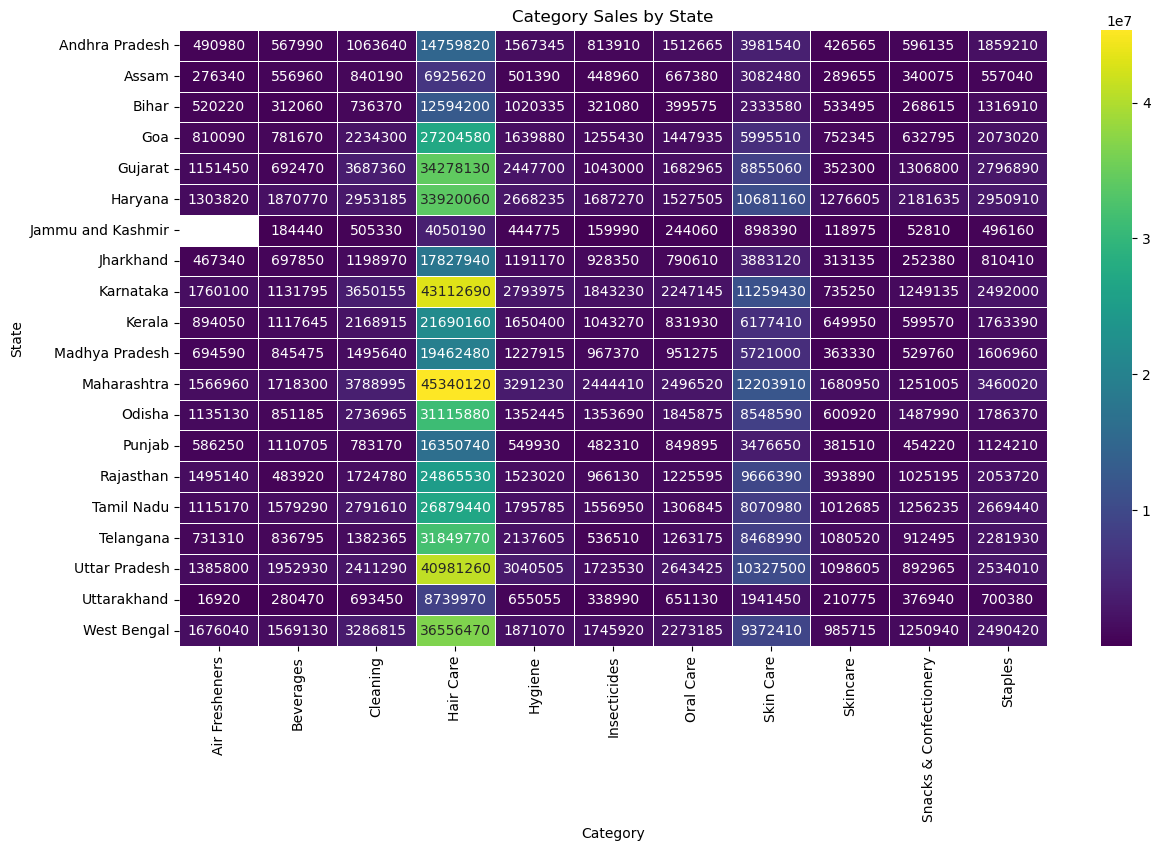

In [109]:
# Group the data by category and state and sum the sales revenue
category_state_sales = df.groupby(['category', 'state'])['sales'].sum().reset_index()

# Pivot the data to have categories as columns and states as rows
category_state_pivot = category_state_sales.pivot(index='state', columns='category', values='sales')

# Plotting the category sales by state
plt.figure(figsize=(14, 8))
sns.heatmap(category_state_pivot, cmap='viridis', annot=True, fmt='.0f', linewidths=.5)
plt.title('Category Sales by State')
plt.xlabel('Category')
plt.ylabel('State')
plt.show()


# What is the overall profit? What is the profit by product and category?

In [110]:
# Calculate profit for each product
df['profit'] = df['sales'] - df['cost_price']

# Calculate profit by category
category_profit = df.groupby('category')['profit'].sum().reset_index()

# Calculate overall profit
overall_profit = df['profit'].sum()

print(f"Overall Profit: {overall_profit}")
print("\nProfit by Category:")
print(category_profit)


Overall Profit: 214005588

Profit by Category:
                  category     profit
0           Air Fresheners    4385100
1                Beverages    4498611
2                 Cleaning    9194461
3                Hair Care  127369490
4                  Hygiene    8338525
5             Insecticides    4957069
6                Oral Care    7162158
7                Skin Care   32090378
8                 Skincare    3358242
9   Snacks & Confectionery    3306314
10                 Staples    9345240


# How are the sales by population and categories?

In [111]:
# Group the data by population and category, and sum the sales
sales_by_population_category = df.groupby(['population', 'category'])['sales'].sum().reset_index()

# Print the result
print(sales_by_population_category)


     population                category    sales
0         72000          Air Fresheners   273910
1         72000               Beverages   156960
2         72000                Cleaning   453270
3         72000               Hair Care  6031890
4         72000                 Hygiene   483725
..          ...                     ...      ...
903    24400000               Oral Care    94460
904    24400000               Skin Care   574280
905    24400000                Skincare    37920
906    24400000  Snacks & Confectionery    68100
907    24400000                 Staples    43870

[908 rows x 3 columns]


# What is the profit for the top 20 products?

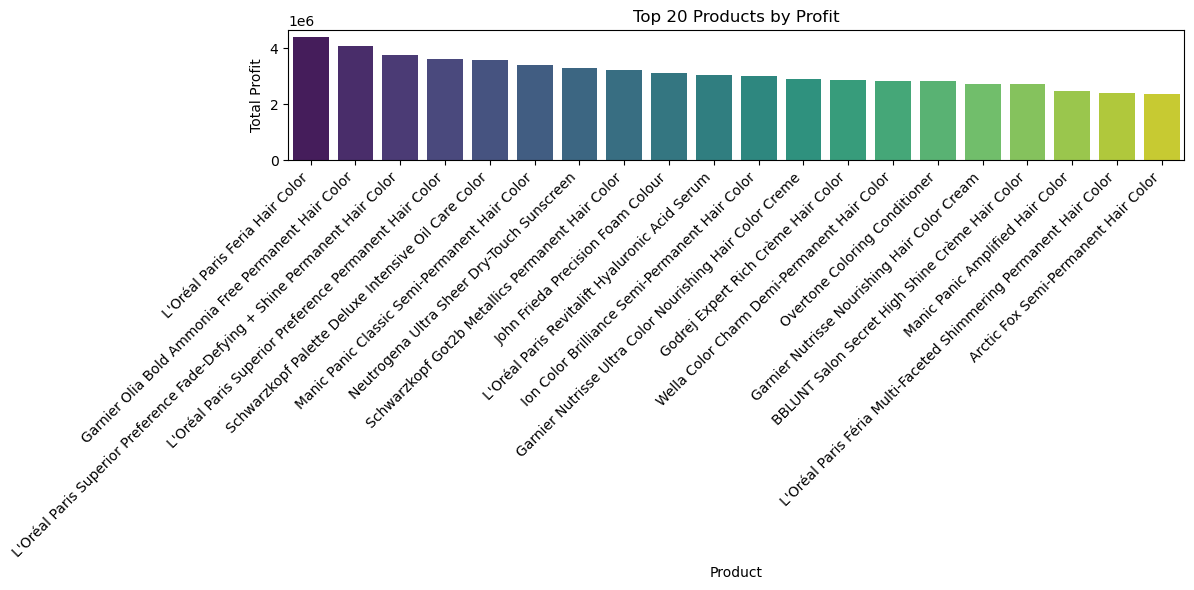

In [112]:

# Group the data by product and sum the profit
profit_by_product = df.groupby('product')['profit'].sum().reset_index()

# Sort the products based on total profit
top_20_profit_products = profit_by_product.sort_values(by='profit', ascending=False).head(20)

# Plotting the bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='product', y='profit', data=top_20_profit_products, palette='viridis')
plt.title('Top 20 Products by Profit')
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Product Performance Index: What are the top 5 products by Product Performance Index (PPI), and how do their performance indices compare to the average performance of all products? 

In [113]:
total_sales = df['sales'].sum()
print("Total Sales:", total_sales)


Total Sales: 860690670


In [114]:
average_sales_all_products = df['sales'].mean()
print(average_sales_all_products)


86069.067


In [115]:
df['PPI'] = (df['sales'] / average_sales_all_products) * 100
sorted_df = df.sort_values('PPI', ascending=False)

top_20_products = sorted_df.head(20)
print(top_20_products)


      order_id   dt_order  product_id        segment   category  \
5308      5309 2020-10-21       10119  Personal Care  Skin Care   
2422      2423 2023-08-08       10131  Personal Care  Hair Care   
9802      9803 2019-09-14       10119  Personal Care  Skin Care   
6608      6609 2022-01-15       10119  Personal Care  Skin Care   
2956      2957 2023-06-05       10108  Personal Care  Skin Care   
1675      1676 2020-08-16       10108  Personal Care  Skin Care   
4046      4047 2019-08-05       10131  Personal Care  Hair Care   
7155      7156 2022-11-18       10119  Personal Care  Skin Care   
4966      4967 2020-01-22       10133  Personal Care  Hair Care   
2896      2897 2019-04-16       10133  Personal Care  Hair Care   
5133      5134 2021-02-15       10108  Personal Care  Skin Care   
4001      4002 2022-07-26       10177  Personal Care  Hair Care   
4922      4923 2021-03-21       10131  Personal Care  Hair Care   
1323      1324 2019-11-14       10131  Personal Care  Hair Car

In [116]:
total_sales = df['sales'].sum()
print("Total Sales:", total_sales)

average_sales_all_products = df['sales'].mean()
print("Average Sales:", average_sales_all_products)

# Calculate the PPI for each product
df['PPI'] = (df['sales'] / average_sales_all_products) * 100

# Sort the products by PPI in descending order
sorted_df = df.sort_values('PPI', ascending=False)

# Select the top 5 products
top_5_products = sorted_df.head(5)

# Print the top 5 products by PPI
print("Top 5 Products by Product Performance Index (PPI):")
print(top_5_products[['product', 'PPI']])


Total Sales: 860690670
Average Sales: 86069.067
Top 5 Products by Product Performance Index (PPI):
                                                product         PPI
5308         La Roche-Posay Effaclar Duo Acne Treatment  405.836861
2422          L'Oréal Paris Excellence Crème Hair Color  404.616911
9802         La Roche-Posay Effaclar Duo Acne Treatment  403.396960
6608         La Roche-Posay Effaclar Duo Acne Treatment  402.583660
2956  Lotus Herbals Safe Sun UV Screen Matte Gel SPF 50  401.770360


# Product Revenue Concentration: What is the proportion of total revenue contributed by the top 5 selling products, and how does this distribution impact overall revenue?


In [117]:
# Calculate total revenue
total_revenue = df['sales'].sum()

# Sort products by sales in descending order
sorted_products = df.groupby('product_id')['sales'].sum().sort_values(ascending=False)

# Calculate proportion of total revenue contributed by the top-selling products
top_products_revenue = sorted_products.head(5).sum()
revenue_concentration = (top_products_revenue / total_revenue) * 100

print("Proportion of total revenue contributed by the top 5 products:", revenue_concentration)


Proportion of total revenue contributed by the top 5 products: 6.445378337841166


# Product Sales Velocity: What are the top 5 products by sales velocity, and how does their sales velocity impact overall revenue and profitability?

In [118]:
# Calculate total sales for each product
total_sales = df.groupby('product')['sales'].sum()

# Calculate the average number of days between orders for each product
df['dt_order'] = pd.to_datetime(df['dt_order'])
df['order_interval'] = df.groupby('product')['dt_order'].diff().dt.days
average_order_interval = df.groupby('product')['order_interval'].mean()

# Calculate sales velocity
sales_velocity = total_sales / average_order_interval

# Get the top 5 products by sales velocity
top_5_sales_velocity = sales_velocity.nlargest(5)

print(top_5_sales_velocity)


product
Lakmé Sun Expert Ultra Matte SPF 50 PA+++ Sunscreen Lotion    6.271081e+07
Sensodyne Fresh Mint Toothpaste                               4.434900e+07
St. Ives Fresh Skin Apricot Face Scrub                        7.538800e+06
Splat Rebellious Fantasy Complete Hair Color Kit              4.650967e+06
Adore Semi-Permanent Hair Color                               3.945028e+06
dtype: float64



# Product Return Rate: What are the top 5 products by return rate, and how does their return rate impact overall revenue and profitability?

In [120]:
# Calculate return rate for each product
df['return_rate'] = df.groupby('product_id')['quantity'].transform('sum') / df.groupby('product_id')['quantity'].transform('count')

# Calculate total return rate for each product
product_return_rate = df.groupby('product_id')['return_rate'].mean().nlargest(5)
print(product_return_rate)


product_id
10122    607.741379
10102    602.071429
10113    601.500000
10147    588.191489
10022    585.047619
Name: return_rate, dtype: float64


# Geographical Analysis

What are our overall and yearly sales and profit?

How are sales and profit in different regions and what is our sales and profit by country?

What is our sales and profit by state in the south region?

Which are our top 10 cities by sales in Karnataka?

Who are our top 5 categories and subcategories in the south region?

what are our sales and profit by product in south region?

What is our sales and Average Discount by subcategory in the south?